In [2]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [3]:
# clean out NaNs and zeros
def extract_all_active_observations_v2(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])) and not any(selected_obs[i,:]==0):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

In [13]:
def plot_time_series(data):
    # only plotting x
    length = data.shape[0]
    fig = plt.figure(figsize = [20,10])
    ax1 = fig.add_subplot(511)
    ax1.plot(data[:,1], label='array 0')  # array 0
    ax1.set_xlim(0,length)
    ax1.set_ylim(-2,2)
    ax1.legend()
    ax2 = fig.add_subplot(512)
    ax2.plot(data[:,4], label='array 1')  # array 1
    ax2.set_xlim(0,length)
    ax2.set_ylim(-2,2)
    ax2.legend()
    ax3 = fig.add_subplot(513)
    ax3.plot(data[:,7], label='array 2')  # array 2
    ax3.set_xlim(0,length)
    ax3.set_ylim(-2,2)
    ax3.legend()  
    ax4 = fig.add_subplot(514)
    ax4.plot(data[:,10], label='array 3') # array 3
    ax4.set_xlim(0,length)
    ax4.set_ylim(-2,2)
    ax4.legend()
    ax5 = fig.add_subplot(515)
    ax5.plot(data[:,16], label='array 5') # array 5
    ax5.set_xlim(0,length)
    ax5.set_ylim(-2,2)
    ax5.legend()
    plt.show()

## note
Two arrays are mounted onto the wall: array 0 and 1, and array 2, 3, 5 are mounted to the ceiling. 

In [5]:
standard = get_time_interval_matrix_data("Dec 23 2020 03:30PM", "Dec 23 2020 03:40PM")
test = get_time_interval_matrix_data("Dec 23 2020 03:40PM", "Dec 23 2020 03:45PM")

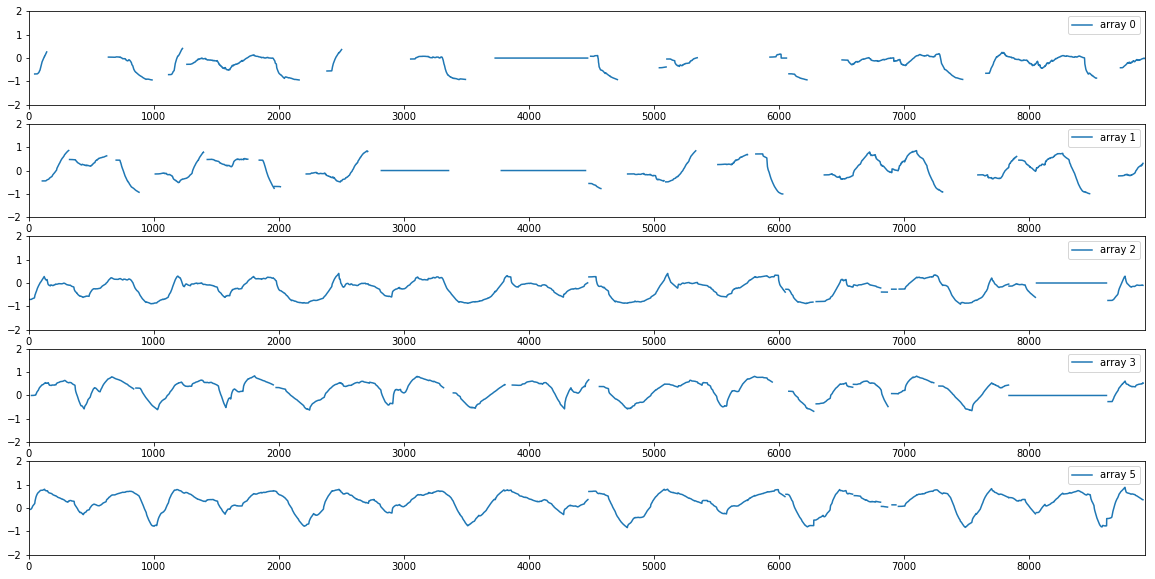

In [14]:
plot_time_series(standard)

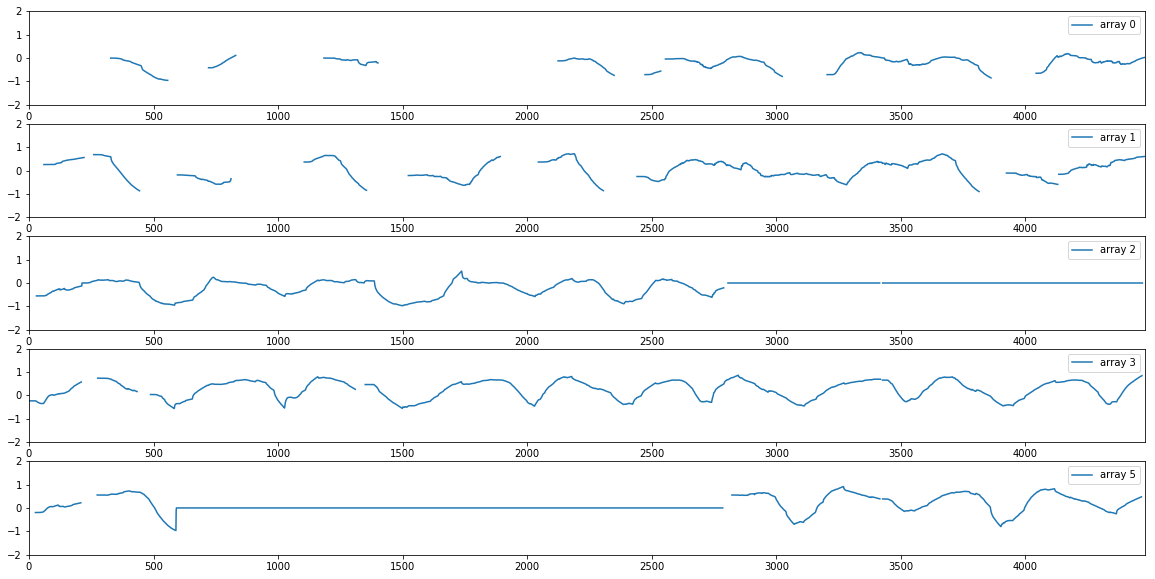

In [15]:
plot_time_series(test)

In [16]:
standard_cleaned, standard_og = extract_all_active_observations_v2(standard, [2,3,5])

In [19]:
standard_og[1:7,:] = np.NaN
standard_cdata = get_cdata(standard_og)
projections_standard = project_to_eigen_vectors(standard_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

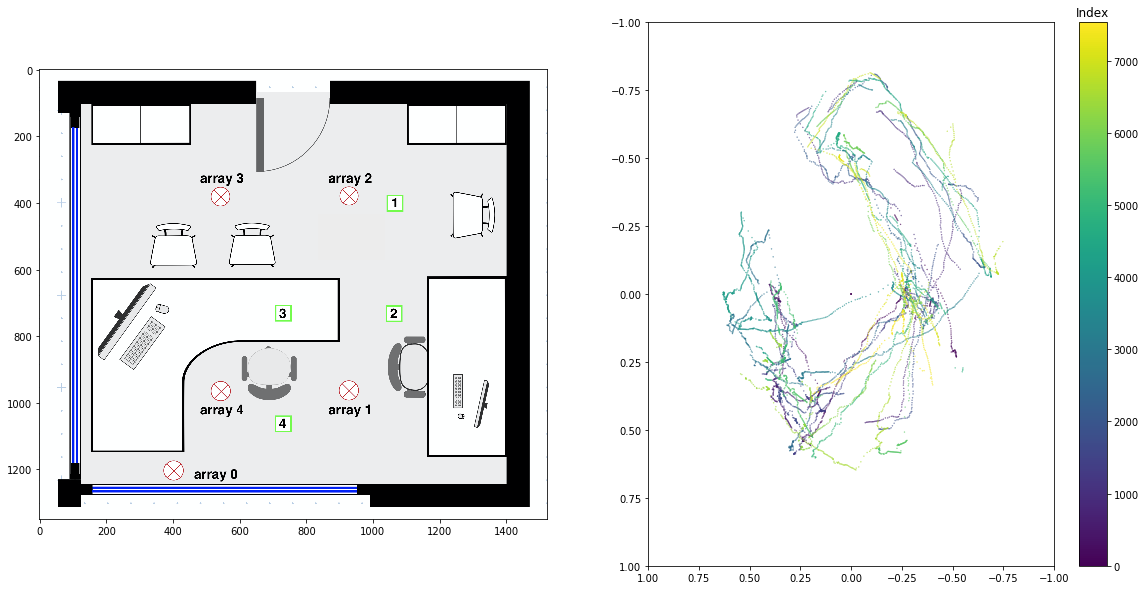

In [39]:
fig = plt.figure(figsize = [20,10])

ax1 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax1.imshow(room_model_chair)
# ax2.invert_xaxis()

ax = fig.add_subplot(122)
temp = ax.scatter(projections_standard[:,0], 
                  projections_standard[:,1], 
                  c = np.arange(projections_standard.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.invert_xaxis()
ax.invert_yaxis()
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

## mapping